In [1]:
import cartopy
import matplotlib.pyplot as plt

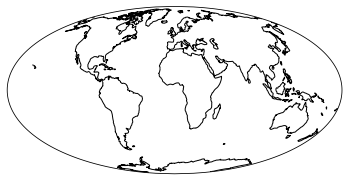

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())
ax.coastlines()

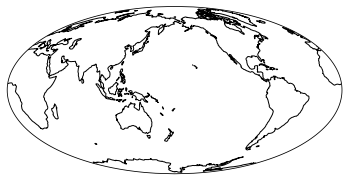

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide(central_longitude=180))
ax.coastlines()

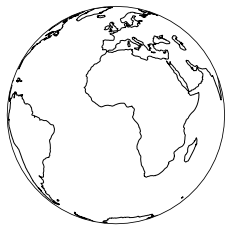

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.Orthographic())
ax.coastlines()

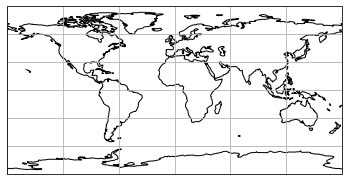

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()

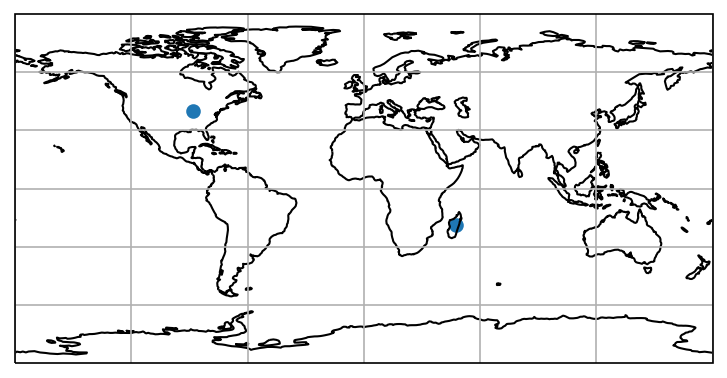

In [6]:
c_lat, c_lon = 40.1164, -88.2434
a_lat, a_lon = -18.8792, 47.5079
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.scatter([c_lon, a_lon], [c_lat, a_lat])
ax.coastlines()
ax.gridlines()
ax.set_global()

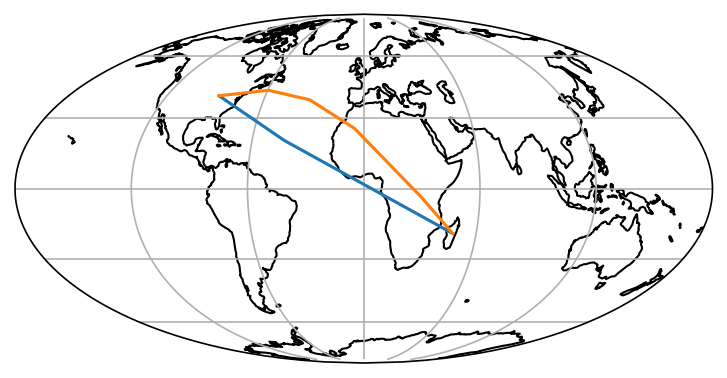

In [7]:
c_lat, c_lon = 40.1164, -88.2434
a_lat, a_lon = -18.8792, 47.5079
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())
ax.plot([c_lon, a_lon], [c_lat, a_lat], transform=cartopy.crs.PlateCarree())
ax.plot([c_lon, a_lon], [c_lat, a_lat], transform=cartopy.crs.Geodetic())
ax.coastlines()
ax.gridlines()
ax.set_global()

In [8]:
import numpy as np
vals = np.random.random((128, 128))

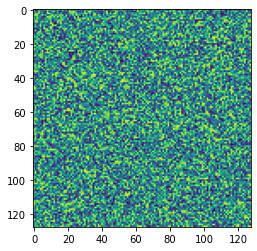

In [9]:
plt.imshow(vals)

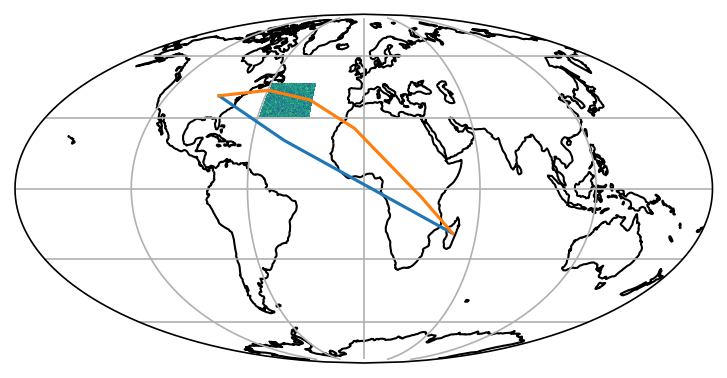

In [10]:
c_lat, c_lon = 40.1164, -88.2434
a_lat, a_lon = -18.8792, 47.5079
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())
ax.plot([c_lon, a_lon], [c_lat, a_lat], transform=cartopy.crs.PlateCarree())
ax.plot([c_lon, a_lon], [c_lat, a_lat], transform=cartopy.crs.Geodetic())
ax.imshow(vals, extent = [-60, -30, 30, 60], transform = cartopy.crs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_global()

In [11]:
import pandas as pd

In [12]:
!rm -f us-counties.csv ; wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

--2020-10-15 13:23:13--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25239715 (24M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]  24.07M  82.2MB/s    in 0.3s    

2020-10-15 13:23:14 (82.2 MB/s) - ‘us-counties.csv’ saved [25239715/25239715]



In [13]:
!rm -f us-states.csv ; wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

--2020-10-15 13:23:14--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412033 (402K) [text/plain]
Saving to: ‘us-states.csv’

us-states.csv       100%[===================>] 402.38K  --.-KB/s    in 0.02s   

2020-10-15 13:23:14 (19.5 MB/s) - ‘us-states.csv’ saved [412033/412033]



In [14]:
states = pd.read_csv("us-states.csv", parse_dates = ["date"])

In [15]:
import bqplot

In [16]:
proj = bqplot.AlbersUSA()
mark = bqplot.Map(map_data = bqplot.topo_load("map_data/USStatesMap.json"),
                  scales = {'projection': proj})
fig = bqplot.Figure(marks = [mark])
display(fig)

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [17]:
case_counts = states.groupby("fips")["cases"].max().to_dict()

proj = bqplot.AlbersUSA()
color_sc = bqplot.ColorScale(scheme = "viridis")
color_ax = bqplot.ColorAxis(scale = color_sc, label = 'Case Count')

mark = bqplot.Map(map_data = bqplot.topo_load("map_data/USStatesMap.json"),
                  scales = {'projection': proj, 'color': color_sc},
                  color = case_counts)
fig = bqplot.Figure(marks = [mark], axes = [color_ax])
display(fig)

Figure(axes=[ColorAxis(label='Case Count', scale=ColorScale(scheme='viridis'))], fig_margin={'top': 60, 'botto…

In [18]:
total_cases = states.groupby("date").sum()

In [19]:
total_cases["cases"]

date
2020-01-21          1
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          3
               ...   
2020-10-09    7698203
2020-10-10    7749789
2020-10-11    7794555
2020-10-12    7840482
2020-10-13    7894994
Name: cases, Length: 267, dtype: int64

In [20]:
x_sc = bqplot.DateScale()
y_sc = bqplot.LogScale()

x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation='vertical')

lines = bqplot.Lines(x = total_cases.index, y = total_cases["cases"],
                     scales = {'x': x_sc, 'y': y_sc})

interval_selector = bqplot.interacts.FastIntervalSelector(scale = x_sc)

fig = bqplot.Figure(marks = [lines], axes = [x_ax, y_ax], interaction = interval_selector)
display(fig)

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LogScale())], fig_margin={'top': 60, …

In [21]:
interval_selector.selected

In [22]:
total_cases.loc[interval_selector.selected[0]:interval_selector.selected[1]]

TypeError: 'NoneType' object is not subscriptable